# Carregando as bibliotecas

In [53]:
import pandas as pd
import numpy as np
import re
import time
import json
pd.set_option("max.columns",150)
%matplotlib inline
%pylab inline

#modelagem
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


d:\ANACONDA\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hstack', 'vstack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Carregando os dados

In [2]:
df = pd.read_csv("raw_data_com_labels.csv", index_col=0, delimiter=';')
df =df[df['p'].notnull()]
df.shape

(1549, 15)

In [3]:
df.head()

,title,p,view_count,description,uploader,upload_date,categories,tags,duration,webpage_url,like_count,average_rating,query,tempo_desde_pub,thumbnail
0,Introduction to Machine Learning | Ù…Ù‚Ø¯Ù…Ø© ...,1,128,Ù„Ùˆ Ù„Ø³Ø© Ø¹Ù†Ø¯Ùƒ Ø§Ø³Ø¦Ù„Ø© Ø³Ø¨Ù‡Ù… ÙÙŠ ...,Deena Gergis,2021-01-01,['Education'],"['Introduction to Machine Learning', 'Course',...",252.0,https://www.youtube.com/watch?v=SjsBGg1s0lo,29.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/SjsBGg1s0lo/maxres...
1,Zero Python & Machine Learning Experience to D...,0,1,"In less than 3 hours, this course will teach y...",Machine Learning by Python,2021-01-01,['Science & Technology'],NaN,102.0,https://www.youtube.com/watch?v=KsP6gPc2lyw,3.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/KsP6gPc2lyw/maxres...
2,Mario I/O Machine Learning For Games,1,1,Subscribe : https://bit.ly/37Nv28i MarI/O is a...,Pro Gamer,2021-01-01,['Gaming'],"['Super Mario World', 'Machine Learning', 'Neu...",342.0,https://www.youtube.com/watch?v=ZnGKJ2qE5Yw,NaN,NaN,machine+learning,28853.0,https://i.ytimg.com/vi_webp/ZnGKJ2qE5Yw/maxres...
3,Model Evaluation Tutorial | Machine Learning (...,1,13,Model Evaluation |,KONNEKSHIN,2021-01-01,['Education'],['Model Evaluation | Machine Learning (ML) | X...,1004.0,https://www.youtube.com/watch?v=57B37uJctso,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/57B37uJctso/maxresdefau...
4,Online Certified Winter Training in Machine Le...,1,98,Reference Notes: 1) Decision tree on Iris Data...,Goeduhub Technologies,2021-01-01,['Education'],NaN,3348.0,https://www.youtube.com/watch?v=tolNACfneQE,12.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/tolNACfneQE/maxresdefau...


# Criando um DF limpo para ser usado no modelo

In [4]:
df_limpo = pd.DataFrame(index=df.index)

In [5]:
df_limpo.head()

""
0
1
2
3
4


In [6]:
df.dtypes

title               object
p                    int64
view_count           int64
description         object
uploader            object
upload_date         object
categories          object
tags                object
duration           float64
webpage_url         object
like_count         float64
average_rating      object
query               object
tempo_desde_pub    float64
thumbnail           object
dtype: object

In [7]:
df_limpo['upload_date'] = df['upload_date']

In [8]:
df_limpo.head()

,upload_date
0,2021-01-01
1,2021-01-01
2,2021-01-01
3,2021-01-01
4,2021-01-01


In [9]:
df_limpo['view_count'] = df['view_count']
df_limpo.head()

,upload_date,view_count
0,2021-01-01,128
1,2021-01-01,1
2,2021-01-01,1
3,2021-01-01,13
4,2021-01-01,98


In [10]:
df_limpo['duration'] = df['duration'].fillna(0).astype('int')
df_limpo.head()

,upload_date,view_count,duration
0,2021-01-01,128,252
1,2021-01-01,1,102
2,2021-01-01,1,342
3,2021-01-01,13,1004
4,2021-01-01,98,3348


In [11]:
df_limpo['like_count'] = df['like_count'].fillna(0).astype('int')
df_limpo.head()

,upload_date,view_count,duration,like_count
0,2021-01-01,128,252,29
1,2021-01-01,1,102,3
2,2021-01-01,1,342,0
3,2021-01-01,13,1004,2
4,2021-01-01,98,3348,12


In [12]:
df_limpo['tempo_desde_pub'] = df['tempo_desde_pub'].fillna(0).astype('int')
df_limpo.head()

,upload_date,view_count,duration,like_count,tempo_desde_pub
0,2021-01-01,128,252,29,28853
1,2021-01-01,1,102,3,28853
2,2021-01-01,1,342,0,28853
3,2021-01-01,13,1004,2,28853
4,2021-01-01,98,3348,12,28853


# Features

In [13]:
features = pd.DataFrame(index=df_limpo.index)
y = df['p'].copy()

In [14]:
(pd.to_datetime("2099-12-31")- pd.to_datetime(df_limpo["upload_date"])) / np.timedelta64(1,'D')

0       28853.0
1       28853.0
2       28853.0
3       28853.0
4       28853.0
         ...   
1544    29538.0
1545    29541.0
1546    29548.0
1547    29548.0
1548    29549.0
Name: upload_date, Length: 1549, dtype: float64

In [15]:
features['tempo_desde_pub'] = (pd.to_datetime("2099-12-31")- pd.to_datetime(df_limpo["upload_date"])) / np.timedelta64(1,'D')
features['views'] = df_limpo['view_count']
features['views_por_dia'] = features['views'] / features['tempo_desde_pub']
features = features.drop(['tempo_desde_pub'], axis=1)
features.head()

,views,views_por_dia
0,128,0.004436
1,1,0.000035
2,1,0.000035
3,13,0.000451
4,98,0.003397


<AxesSubplot:>

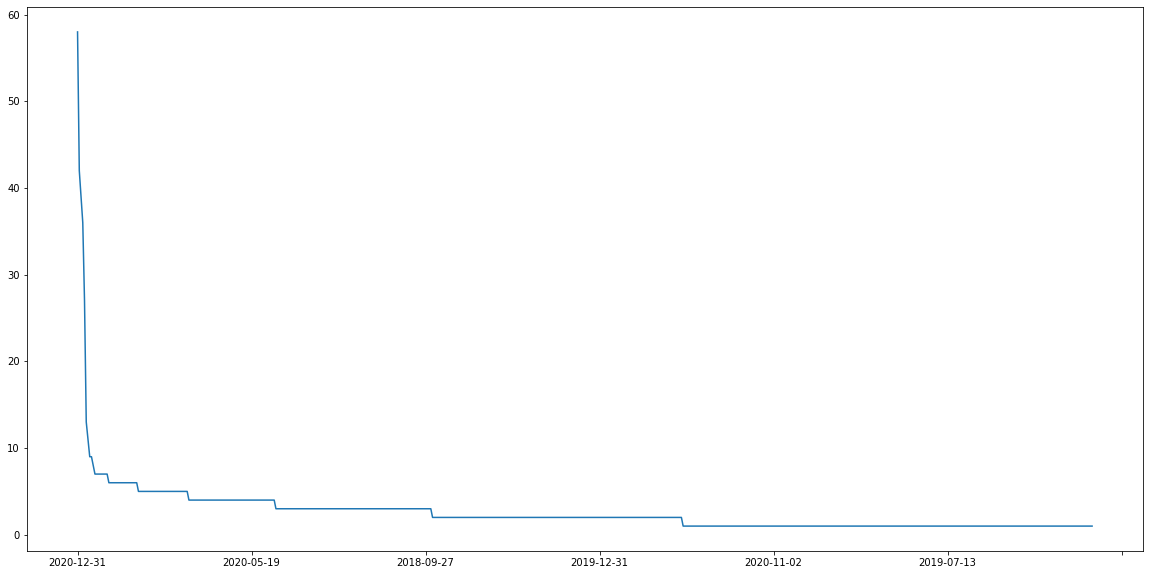

In [16]:
df_limpo['upload_date'].value_counts().plot(figsize=(20,10))

In [17]:
Xtrain, Xval = features[df_limpo['upload_date'] < '2020-06-15'],features[df_limpo['upload_date'] >= '2020-06-15']
Ytrain, Yval = y[df_limpo['upload_date'] < '2020-06-15'],y[df_limpo['upload_date'] >= '2020-06-15']
Xtrain.shape, Xval.shape, Ytrain.shape, Yval.shape

((758, 2), (791, 2), (758,), (791,))

In [18]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight='balanced')
mdl.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [19]:
p = mdl.predict_proba(Xval)[:, 1]

In [20]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [22]:
average_precision_score(Yval, p)

0.47954419156817363

In [24]:
roc_auc_score(Yval, p)

0.4989657248251658

In [25]:
from sklearn.tree import plot_tree

[Text(279.0, 453.0, 'views_por_dia <= 0.001\ngini = 0.5\nsamples = 758\nvalue = [379.0, 379.0]'),
 Text(139.5, 271.8, 'views_por_dia <= 0.001\ngini = 0.49\nsamples = 365\nvalue = [217.164, 162.876]'),
 Text(69.75, 90.59999999999997, 'gini = 0.492\nsamples = 353\nvalue = [206.099, 159.744]'),
 Text(209.25, 90.59999999999997, 'gini = 0.344\nsamples = 12\nvalue = [11.066, 3.132]'),
 Text(418.5, 271.8, 'views <= 506.5\ngini = 0.49\nsamples = 393\nvalue = [161.836, 216.124]'),
 Text(348.75, 90.59999999999997, 'gini = 0.482\nsamples = 330\nvalue = [127.255, 186.368]'),
 Text(488.25, 90.59999999999997, 'gini = 0.497\nsamples = 63\nvalue = [34.58, 29.756]')]

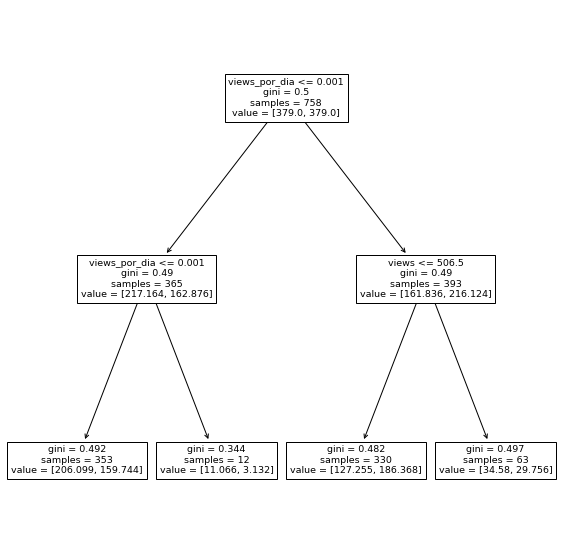

In [28]:
fig, ax = pylab.subplots(1,1, figsize=(10,10))
plot_tree(mdl, ax=ax, feature_names=Xtrain.columns)

# Transformar string em numero

In [30]:
df_limpo['title'] = df['title']

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

mask_train = df_limpo['upload_date'] < '2020-06-15'
mask_val = df_limpo['upload_date'] >= '2020-06-15'

title_train = df_limpo[mask_train]['title']
title_val = df_limpo[mask_val]['title']

title_vec = TfidfVectorizer(min_df=2)

title_bow_train = title_vec.fit_transform(title_train)
title_bow_val = title_vec.transform(title_val)


In [79]:
title_bow_train.shape, title_bow_val.shape

((758, 635), (791, 635))

In [80]:
from scipy.sparse import hstack, vstack

Xtrain_wtitle = hstack([Xtrain, title_bow_train])
Xval_wtitle = hstack([Xval, title_bow_val])

Xtrain_wtitle.shape, Xval_wtitle.shape

((758, 637), (791, 637))

In [81]:
mdl = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced', n_jobs=8)
mdl.fit(Xtrain_wtitle, Ytrain)

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=8,
                       random_state=0)

In [82]:
p = mdl.predict_proba(Xval_wtitle)[:, 1]

In [83]:
average_precision_score(Yval, p)

0.5831440438538069

In [84]:
roc_auc_score(Yval, p)

0.614750108871071

In [85]:
# RF
# ap 0.5831440438538069, auc 0.614750108871071 - mindf=2 # este é melhor
# ap 0.5798770009195482, auc 0.6143626559417987 - mindf=1
# ap 0.5776827154868773, auc 0.6044778031098701 - mindf=3

# ACTIVE LEARNING

In [86]:
# Vamos melhorar o modelo para os exemplos aonde as previsoes 
# estao na duvida, por exemplo:
#
# aonde a previsao, que deveria ser 0 ou 1 está entre 0.4 e 0.6
#
#
# um detalhe importante... era para ter deixado alguns registros 
# sem o valor 0 e 1 e nao serem utilizados na modelagem inicial,
# mas nao tem problemas... vamos seguir assim mesmo que nao tem erro.

In [88]:
df_unlabeled = pd.read_csv('raw_data_com_labels.csv', index_col=0, delimiter=';')
df_unlabeled.shape

(1549, 15)

In [93]:
df_unlabeled.dtypes

title               object
p                    int64
view_count           int64
description         object
uploader            object
upload_date         object
categories          object
tags                object
duration           float64
webpage_url         object
like_count         float64
average_rating      object
query               object
tempo_desde_pub    float64
thumbnail           object
dtype: object

In [94]:
df_limpo_u = pd.DataFrame(index=df_unlabeled.index)
df_limpo_u['title'] = df_unlabeled['title']
df_limpo_u['upload_date'] = df_unlabeled['upload_date']
df_limpo_u.head()

,title,upload_date
0,Introduction to Machine Learning | Ù…Ù‚Ø¯Ù…Ø© ...,2021-01-01
1,Zero Python & Machine Learning Experience to D...,2021-01-01
2,Mario I/O Machine Learning For Games,2021-01-01
3,Model Evaluation Tutorial | Machine Learning (...,2021-01-01
4,Online Certified Winter Training in Machine Le...,2021-01-01


In [95]:
df_limpo_u['view_count'] = df_unlabeled['view_count']
df_limpo_u.head()

,title,upload_date,view_count
0,Introduction to Machine Learning | Ù…Ù‚Ø¯Ù…Ø© ...,2021-01-01,128
1,Zero Python & Machine Learning Experience to D...,2021-01-01,1
2,Mario I/O Machine Learning For Games,2021-01-01,1
3,Model Evaluation Tutorial | Machine Learning (...,2021-01-01,13
4,Online Certified Winter Training in Machine Le...,2021-01-01,98


In [97]:
features_u = pd.DataFrame(index=df_limpo_u.index)
features_u['tempo_desde_pub'] = (pd.to_datetime("2099-12-31")- pd.to_datetime(df_limpo_u["upload_date"])) / np.timedelta64(1,'D')
features_u['views'] = df_limpo_u['view_count']
features_u['views_por_dia'] = features_u['views'] / features_u['tempo_desde_pub']
features_u = features_u.drop(['tempo_desde_pub'], axis=1)
features_u.head()

,views,views_por_dia
0,128,0.004436
1,1,0.000035
2,1,0.000035
3,13,0.000451
4,98,0.003397


In [98]:
#from sklearn.feature_extraction.text import TfidfVectorizer

title_u = df_limpo_u['title']
title_bow_u = title_vec.transform(title_u)

In [99]:
title_bow_u

<1549x635 sparse matrix of type '<class 'numpy.float64'>'
	with 10463 stored elements in Compressed Sparse Row format>

In [100]:
Xu_wtitle = hstack([features_u, title_bow_u])
Xu_wtitle

<1549x637 sparse matrix of type '<class 'numpy.float64'>'
	with 13551 stored elements in COOrdinate format>

In [102]:
pu = mdl.predict_proba(Xu_wtitle)[:, 1]

In [103]:
df_unlabeled.head()

,title,p,view_count,description,uploader,upload_date,categories,tags,duration,webpage_url,like_count,average_rating,query,tempo_desde_pub,thumbnail
0,Introduction to Machine Learning | Ù…Ù‚Ø¯Ù…Ø© ...,1,128,Ù„Ùˆ Ù„Ø³Ø© Ø¹Ù†Ø¯Ùƒ Ø§Ø³Ø¦Ù„Ø© Ø³Ø¨Ù‡Ù… ÙÙŠ ...,Deena Gergis,2021-01-01,['Education'],"['Introduction to Machine Learning', 'Course',...",252.0,https://www.youtube.com/watch?v=SjsBGg1s0lo,29.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/SjsBGg1s0lo/maxres...
1,Zero Python & Machine Learning Experience to D...,0,1,"In less than 3 hours, this course will teach y...",Machine Learning by Python,2021-01-01,['Science & Technology'],NaN,102.0,https://www.youtube.com/watch?v=KsP6gPc2lyw,3.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/KsP6gPc2lyw/maxres...
2,Mario I/O Machine Learning For Games,1,1,Subscribe : https://bit.ly/37Nv28i MarI/O is a...,Pro Gamer,2021-01-01,['Gaming'],"['Super Mario World', 'Machine Learning', 'Neu...",342.0,https://www.youtube.com/watch?v=ZnGKJ2qE5Yw,NaN,NaN,machine+learning,28853.0,https://i.ytimg.com/vi_webp/ZnGKJ2qE5Yw/maxres...
3,Model Evaluation Tutorial | Machine Learning (...,1,13,Model Evaluation |,KONNEKSHIN,2021-01-01,['Education'],['Model Evaluation | Machine Learning (ML) | X...,1004.0,https://www.youtube.com/watch?v=57B37uJctso,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/57B37uJctso/maxresdefau...
4,Online Certified Winter Training in Machine Le...,1,98,Reference Notes: 1) Decision tree on Iris Data...,Goeduhub Technologies,2021-01-01,['Education'],NaN,3348.0,https://www.youtube.com/watch?v=tolNACfneQE,12.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/tolNACfneQE/maxresdefau...


In [104]:
df_unlabeled['p1'] = pu
df_unlabeled.head()

,title,p,view_count,description,uploader,upload_date,categories,tags,duration,webpage_url,like_count,average_rating,query,tempo_desde_pub,thumbnail,p1
0,Introduction to Machine Learning | Ù…Ù‚Ø¯Ù…Ø© ...,1,128,Ù„Ùˆ Ù„Ø³Ø© Ø¹Ù†Ø¯Ùƒ Ø§Ø³Ø¦Ù„Ø© Ø³Ø¨Ù‡Ù… ÙÙŠ ...,Deena Gergis,2021-01-01,['Education'],"['Introduction to Machine Learning', 'Course',...",252.0,https://www.youtube.com/watch?v=SjsBGg1s0lo,29.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/SjsBGg1s0lo/maxres...,0.871000
1,Zero Python & Machine Learning Experience to D...,0,1,"In less than 3 hours, this course will teach y...",Machine Learning by Python,2021-01-01,['Science & Technology'],NaN,102.0,https://www.youtube.com/watch?v=KsP6gPc2lyw,3.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/KsP6gPc2lyw/maxres...,0.599159
2,Mario I/O Machine Learning For Games,1,1,Subscribe : https://bit.ly/37Nv28i MarI/O is a...,Pro Gamer,2021-01-01,['Gaming'],"['Super Mario World', 'Machine Learning', 'Neu...",342.0,https://www.youtube.com/watch?v=ZnGKJ2qE5Yw,NaN,NaN,machine+learning,28853.0,https://i.ytimg.com/vi_webp/ZnGKJ2qE5Yw/maxres...,0.640000
3,Model Evaluation Tutorial | Machine Learning (...,1,13,Model Evaluation |,KONNEKSHIN,2021-01-01,['Education'],['Model Evaluation | Machine Learning (ML) | X...,1004.0,https://www.youtube.com/watch?v=57B37uJctso,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/57B37uJctso/maxresdefau...,0.658000
4,Online Certified Winter Training in Machine Le...,1,98,Reference Notes: 1) Decision tree on Iris Data...,Goeduhub Technologies,2021-01-01,['Education'],NaN,3348.0,https://www.youtube.com/watch?v=tolNACfneQE,12.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/tolNACfneQE/maxresdefau...,0.871000


In [109]:
mask_u = (df_unlabeled['p1'] >= 0.4) & (df_unlabeled['p1'] <= 0.6)
mask_u.sum()

265

In [110]:
df_unlabeled[mask_u]

,title,p,view_count,description,uploader,upload_date,categories,tags,duration,webpage_url,like_count,average_rating,query,tempo_desde_pub,thumbnail,p1
1,Zero Python & Machine Learning Experience to D...,0,1,"In less than 3 hours, this course will teach y...",Machine Learning by Python,2021-01-01,['Science & Technology'],NaN,102.0,https://www.youtube.com/watch?v=KsP6gPc2lyw,3.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/KsP6gPc2lyw/maxres...,0.599159
8,[Kotlin Android Firebase 16+] EP.26 - Machine ...,0,27,This video is a lecture how to make an applica...,HOWLAB,2021-01-01,['Education'],"['android', 'develop', 'application', 'kotlin'...",366.0,https://www.youtube.com/watch?v=EOa4y8RDmQc,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/EOa4y8RDmQc/maxresdefau...,0.597000
13,Tomb Raider 3 FMV 1 Core logo (4K - AI Machine...,0,2,Original FMV Remastered using AI,Andy Jake,2021-01-01,['Gaming'],"['Tomb Raider 3', 'Core logo', 'FMV', 'Remaste...",59.0,https://www.youtube.com/watch?v=VaajnJdcZ40,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/VaajnJdcZ40/maxres...,0.454000
19,How To Prepare Deep Learning In 2021 In Hindi-...,1,1,Complete DL Playlist: https://www.youtube.com/...,Krish Naik Vlogs,2020-12-31,['People & Blogs'],NaN,631.0,https://www.youtube.com/watch?v=1uJgdDIAjsY,132.0,5.0,machine+learning,28854.0,https://i.ytimg.com/vi_webp/1uJgdDIAjsY/maxres...,0.574159
21,Lesson 27 â€“ Python Pandas DataFrames In Mach...,1,2,In this lesson I will show you how to use Data...,Robo Thoughts,2020-12-31,['Science & Technology'],"['Pandas', 'Educational Videos', 'Jetson Nano'...",329.0,https://www.youtube.com/watch?v=r4X_Pvwu1aE,NaN,NaN,machine+learning,28854.0,https://i.ytimg.com/vi/r4X_Pvwu1aE/hqdefault.j...,0.498000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,06.Ø´Ø±Ø­ Ø¬ÙˆØ¬Ù„ ÙƒÙˆÙ„Ø§Ø¨ | Google Colab :...,0,385,Ø§Ù„Ø³Ù„Ø§Ù… Ø¹Ù„ÙŠÙƒÙ… ÙŠØ§ Ø´Ø¨Ø§Ø¨ ÙÙ‰ Ø§Ù...,Karim Elgazar I ÙƒØ±ÙŠÙ… Ø§Ù„Ø¬Ø²Ø§Ø±,2020-06-24,['Education'],"['Google colabs', 'colabs', 'tensorflow colabs...",958.0,https://www.youtube.com/watch?v=YEHCWyMU5Qs,17.0,5.0,kaggle,29044.0,https://i.ytimg.com/vi/YEHCWyMU5Qs/maxresdefau...,0.531000
1264,Getting Curious: What it takes to build a TPU ...,1,840,Have you ever wondered what kind of background...,Kaggle,2020-06-23,['Science & Technology'],"['Kaggle', 'Kaggel', 'coffee chat', 'live-codi...",438.0,https://www.youtube.com/watch?v=8WlhQ1ouWkU,39.0,5.0,kaggle,29045.0,https://i.ytimg.com/vi/8WlhQ1ouWkU/maxresdefau...,0.457000
1266,Kaggle Vs Real-world Projects,0,441,"In this episode, I am going to cover the diffe...",ankitrathi.com,2020-06-23,['Science & Technology'],"['Data Science', 'Machine Learning', 'Artifici...",442.0,https://www.youtube.com/watch?v=IhGpuLFv4Ho,23.0,5.0,kaggle,29045.0,https://i.ytimg.com/vi/IhGpuLFv4Ho/maxresdefau...,0.566000
1267,Learn With Me: Getting Started with Tensor Pro...,0,11,I recently had the opportunity to sit down wit...,Kaggle,2020-06-22,['Science & Technology'],"['Kaggle', 'Kaggel', 'coffee chat', 'live-codi...",581.0,https://www.youtube.com/watch?v=1pdwRQ1DQfY,323.0,49.270.515,kaggle,29046.0,https://i.ytimg.com/vi/1pdwRQ1DQfY/maxresdefau...,0.547000


In [111]:
dificeis = df_unlabeled[mask_u]

In [119]:
aleatorios = df_unlabeled[~mask_u].sample(115, random_state=0)

In [120]:
pd.concat([dificeis, aleatorios]).to_csv('active_label1.csv')

In [121]:
dificeis.head()

,title,p,view_count,description,uploader,upload_date,categories,tags,duration,webpage_url,like_count,average_rating,query,tempo_desde_pub,thumbnail,p1
1,Zero Python & Machine Learning Experience to D...,0,1,"In less than 3 hours, this course will teach y...",Machine Learning by Python,2021-01-01,['Science & Technology'],NaN,102.0,https://www.youtube.com/watch?v=KsP6gPc2lyw,3.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/KsP6gPc2lyw/maxres...,0.599159
8,[Kotlin Android Firebase 16+] EP.26 - Machine ...,0,27,This video is a lecture how to make an applica...,HOWLAB,2021-01-01,['Education'],"['android', 'develop', 'application', 'kotlin'...",366.0,https://www.youtube.com/watch?v=EOa4y8RDmQc,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/EOa4y8RDmQc/maxresdefau...,0.597000
13,Tomb Raider 3 FMV 1 Core logo (4K - AI Machine...,0,2,Original FMV Remastered using AI,Andy Jake,2021-01-01,['Gaming'],"['Tomb Raider 3', 'Core logo', 'FMV', 'Remaste...",59.0,https://www.youtube.com/watch?v=VaajnJdcZ40,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/VaajnJdcZ40/maxres...,0.454000
19,How To Prepare Deep Learning In 2021 In Hindi-...,1,1,Complete DL Playlist: https://www.youtube.com/...,Krish Naik Vlogs,2020-12-31,['People & Blogs'],NaN,631.0,https://www.youtube.com/watch?v=1uJgdDIAjsY,132.0,5.0,machine+learning,28854.0,https://i.ytimg.com/vi_webp/1uJgdDIAjsY/maxres...,0.574159
21,Lesson 27 â€“ Python Pandas DataFrames In Mach...,1,2,In this lesson I will show you how to use Data...,Robo Thoughts,2020-12-31,['Science & Technology'],"['Pandas', 'Educational Videos', 'Jetson Nano'...",329.0,https://www.youtube.com/watch?v=r4X_Pvwu1aE,NaN,NaN,machine+learning,28854.0,https://i.ytimg.com/vi/r4X_Pvwu1aE/hqdefault.j...,0.498000


In [122]:
aleatorios.head()

,title,p,view_count,description,uploader,upload_date,categories,tags,duration,webpage_url,like_count,average_rating,query,tempo_desde_pub,thumbnail,p1
1008,5 Ways Data Science Changed Finance,0,15,Download Our Free,365 Data Science,2020-01-22,['Education'],"['365 data science', '5 ways data science is u...",775.0,https://www.youtube.com/watch?v=l_FGeEvqYyM,529.0,49.625.468,data+science,29198.0,https://i.ytimg.com/vi/l_FGeEvqYyM/hqdefault.j...,0.077
805,Top 5 Data Science Projects/Ideas For Your Res...,1,22,Here is a list of,Krish Naik,2020-09-20,['Education'],"['Data science projects with source code', 'Da...",1314.0,https://www.youtube.com/watch?v=FNfBR7ZnyWo,1417.0,495.258,data+science,28956.0,https://i.ytimg.com/vi/FNfBR7ZnyWo/maxresdefau...,0.618
564,Machine Learning Tutorial Python - 8: Logisti...,1,130,Logistic regression is used for classification...,codebasics,2018-09-07,['Education'],"['logistic regression python tutorial', 'sklea...",1159.0,https://www.youtube.com/watch?v=zM4VZR0px8E,2025.0,49.054.966,machine+learning,29700.0,https://i.ytimg.com/vi_webp/zM4VZR0px8E/maxres...,0.995
266,Stock Market Prediction Using Machine Learning...,0,12,Stock Market prediction is an everyday use cas...,Simplilearn,2020-06-25,['Education'],['stock market prediction using machine learni...,2103.0,https://www.youtube.com/watch?v=OXwZtlcTiuk,333.0,49.176.469,machine+learning,29043.0,https://i.ytimg.com/vi/OXwZtlcTiuk/maxresdefau...,0.680
1505,statsprof - Searching for datasets and Kaggle,1,448,NaN,"Sergio Garcia, PhD",2019-02-27,['Education'],NaN,805.0,https://www.youtube.com/watch?v=1n5Oef5CcOI,NaN,NaN,kaggle,29527.0,https://i.ytimg.com/vi_webp/1n5Oef5CcOI/maxres...,0.827


In [123]:
# nesta etapa iriamos preencher a nota destes videos com 0 ou 1
# mas ja tinhamos preenchido... entao vida que segue!

# Resultado do Active Learning

In [124]:
df1 = pd.read_csv('raw_data_com_labels.csv', index_col=0, delimiter=';')

In [125]:
df1.head()

,title,p,view_count,description,uploader,upload_date,categories,tags,duration,webpage_url,like_count,average_rating,query,tempo_desde_pub,thumbnail
0,Introduction to Machine Learning | Ù…Ù‚Ø¯Ù…Ø© ...,1,128,Ù„Ùˆ Ù„Ø³Ø© Ø¹Ù†Ø¯Ùƒ Ø§Ø³Ø¦Ù„Ø© Ø³Ø¨Ù‡Ù… ÙÙŠ ...,Deena Gergis,2021-01-01,['Education'],"['Introduction to Machine Learning', 'Course',...",252.0,https://www.youtube.com/watch?v=SjsBGg1s0lo,29.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/SjsBGg1s0lo/maxres...
1,Zero Python & Machine Learning Experience to D...,0,1,"In less than 3 hours, this course will teach y...",Machine Learning by Python,2021-01-01,['Science & Technology'],NaN,102.0,https://www.youtube.com/watch?v=KsP6gPc2lyw,3.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/KsP6gPc2lyw/maxres...
2,Mario I/O Machine Learning For Games,1,1,Subscribe : https://bit.ly/37Nv28i MarI/O is a...,Pro Gamer,2021-01-01,['Gaming'],"['Super Mario World', 'Machine Learning', 'Neu...",342.0,https://www.youtube.com/watch?v=ZnGKJ2qE5Yw,NaN,NaN,machine+learning,28853.0,https://i.ytimg.com/vi_webp/ZnGKJ2qE5Yw/maxres...
3,Model Evaluation Tutorial | Machine Learning (...,1,13,Model Evaluation |,KONNEKSHIN,2021-01-01,['Education'],['Model Evaluation | Machine Learning (ML) | X...,1004.0,https://www.youtube.com/watch?v=57B37uJctso,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/57B37uJctso/maxresdefau...
4,Online Certified Winter Training in Machine Le...,1,98,Reference Notes: 1) Decision tree on Iris Data...,Goeduhub Technologies,2021-01-01,['Education'],NaN,3348.0,https://www.youtube.com/watch?v=tolNACfneQE,12.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/tolNACfneQE/maxresdefau...


In [127]:
df2 = pd.read_csv('active_label1.csv', index_col=0)
df2['novo'] = 1
df2.head()

,title,p,view_count,description,uploader,upload_date,categories,tags,duration,webpage_url,like_count,average_rating,query,tempo_desde_pub,thumbnail,p1,novo
1,Zero Python & Machine Learning Experience to D...,0,1,"In less than 3 hours, this course will teach y...",Machine Learning by Python,2021-01-01,['Science & Technology'],NaN,102.0,https://www.youtube.com/watch?v=KsP6gPc2lyw,3.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/KsP6gPc2lyw/maxres...,0.599159,1
8,[Kotlin Android Firebase 16+] EP.26 - Machine ...,0,27,This video is a lecture how to make an applica...,HOWLAB,2021-01-01,['Education'],"['android', 'develop', 'application', 'kotlin'...",366.0,https://www.youtube.com/watch?v=EOa4y8RDmQc,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi/EOa4y8RDmQc/maxresdefau...,0.597000,1
13,Tomb Raider 3 FMV 1 Core logo (4K - AI Machine...,0,2,Original FMV Remastered using AI,Andy Jake,2021-01-01,['Gaming'],"['Tomb Raider 3', 'Core logo', 'FMV', 'Remaste...",59.0,https://www.youtube.com/watch?v=VaajnJdcZ40,2.0,5.0,machine+learning,28853.0,https://i.ytimg.com/vi_webp/VaajnJdcZ40/maxres...,0.454000,1
19,How To Prepare Deep Learning In 2021 In Hindi-...,1,1,Complete DL Playlist: https://www.youtube.com/...,Krish Naik Vlogs,2020-12-31,['People & Blogs'],NaN,631.0,https://www.youtube.com/watch?v=1uJgdDIAjsY,132.0,5.0,machine+learning,28854.0,https://i.ytimg.com/vi_webp/1uJgdDIAjsY/maxres...,0.574159,1
21,Lesson 27 â€“ Python Pandas DataFrames In Mach...,1,2,In this lesson I will show you how to use Data...,Robo Thoughts,2020-12-31,['Science & Technology'],"['Pandas', 'Educational Videos', 'Jetson Nano'...",329.0,https://www.youtube.com/watch?v=r4X_Pvwu1aE,NaN,NaN,machine+learning,28854.0,https://i.ytimg.com/vi/r4X_Pvwu1aE/hqdefault.j...,0.498000,1


In [129]:
average_precision_score(df2['p'],df2['p1']), roc_auc_score(df2['p'],df2['p1'])

(0.7470792523607148, 0.6998696291365011)

In [130]:
df = pd.concat([df1,df2.drop('p1',axis=1)])

In [141]:
y = df['p'].copy()

In [133]:
df_limpo = pd.DataFrame(index=df.index)
df_limpo['title'] = df['title']
df_limpo['novo'] = df['novo'].fillna(0)

In [135]:
df_limpo['upload_date'] = df['upload_date']
df_limpo['view_count'] = df['view_count']
features = pd.DataFrame(index=df_limpo.index)
features['tempo_desde_pub'] = (pd.to_datetime("2099-12-31")- pd.to_datetime(df_limpo["upload_date"])) / np.timedelta64(1,'D')
features['views'] = df_limpo['view_count']
features['views_por_dia'] = features['views'] / features['tempo_desde_pub']
features = features.drop(['tempo_desde_pub'], axis=1)
df_limpo['views_por_dia'] = features['views_por_dia']
df_limpo.head()

,title,novo,upload_date,view_count,views_por_dia
0,Introduction to Machine Learning | Ù…Ù‚Ø¯Ù…Ø© ...,0.0,2021-01-01,128,0.004436
1,Zero Python & Machine Learning Experience to D...,0.0,2021-01-01,1,0.000035
2,Mario I/O Machine Learning For Games,0.0,2021-01-01,1,0.000035
3,Model Evaluation Tutorial | Machine Learning (...,0.0,2021-01-01,13,0.000451
4,Online Certified Winter Training in Machine Le...,0.0,2021-01-01,98,0.003397


In [142]:
mask_train = (df_limpo['upload_date'] < "2020-06-15") & (df_limpo['novo'] == 0)
#mask_val = (df_limpo['date'] >= "2019-04-01") & (df_limpo['novo'] == 0)
mask_val = (df_limpo['upload_date'] >= "2020-06-15")

Xtrain, Xval = features[mask_train], features[mask_val]
Ytrain, Yval = y[mask_train], y[mask_val]
Xtrain.shape, Xval.shape, Ytrain.shape, Yval.shape

((758, 2), (1102, 2), (758,), (1102,))

In [143]:
title_train = df_limpo[mask_train]['title']
title_val = df_limpo[mask_val]['title']

title_vec = TfidfVectorizer(min_df=2)
title_bow_train = title_vec.fit_transform(title_train)
title_bow_val = title_vec.transform(title_val)

In [144]:
title_bow_train.shape

(758, 635)

In [145]:
Xtrain_wtitle = hstack([Xtrain, title_bow_train])
Xval_wtitle = hstack([Xval, title_bow_val])

In [146]:
Xtrain_wtitle.shape, Xval_wtitle.shape

((758, 637), (1102, 637))

In [148]:
mdl = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight="balanced", n_jobs=8)
mdl.fit(Xtrain_wtitle, Ytrain)

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=8,
                       random_state=0)

In [149]:
p = mdl.predict_proba(Xval_wtitle)[:, 1]

In [150]:
average_precision_score(Yval, p), roc_auc_score(Yval, p)

(0.5696533333071685, 0.5992090988280012)

# Aumentando o treino

In [152]:
mask_train = (df_limpo['upload_date'] < "2020-06-15")
mask_val = (df_limpo['upload_date'] >= "2020-06-15")

In [154]:
Xtrain, Xval = features[mask_train], features[mask_val]
Ytrain, Yval = y[mask_train], y[mask_val]
Xtrain.shape, Xval.shape, Ytrain.shape, Yval.shape

title_train = df_limpo[mask_train]['title']
title_val = df_limpo[mask_val]['title']

title_vec = TfidfVectorizer(min_df=2)
title_bow_train = title_vec.fit_transform(title_train)
title_bow_val = title_vec.transform(title_val)

Xtrain_wtitle = hstack([Xtrain, title_bow_train])
Xval_wtitle = hstack([Xval, title_bow_val])


mdl = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight="balanced", n_jobs=8)
mdl.fit(Xtrain_wtitle, Ytrain)

p = mdl.predict_proba(Xval_wtitle)[:, 1]

average_precision_score(Yval, p), roc_auc_score(Yval, p)

(0.5715939112268373, 0.6029293369232394)